# Logistic Regression
- Binary Classification model

## A simple example

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
pass_time = [8,9, 9, 9.5, 10, 12, 14, 14.5, 15, 16, 16, 16.5, 17, 17, 17, 17.5,20, 20, 20]
fail_time = [1, 2, 2.1,2.6,2.7,2.8,2.9, 3,3.2,3.4,3.5,3.6,3, 5,5.2,5.4]

In [ ]:
X = np.concatenate((pass_time, fail_time))  # 아래와 동일
X

In [ ]:
X = np.hstack((pass_time,fail_time))          # stack horizontally
X

In [ ]:
y1=[1]*len(pass_time)
y0=[0]*len(fail_time)
y = np.hstack((y1,y0))
y

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.xlim(0, 21)
plt.ylim(-0.1, 1.1)
plt.xlabel("Study time")
plt.ylabel("Pass rate")
plt.scatter(X, y)
plt.show()

In [ ]:
model = LogisticRegression()
model.fit(X.reshape(-1, 1),y)

print(model.coef_)
print(model.intercept_)

In [ ]:
model.predict(np.array([6.9]).reshape(-1,1))

In [ ]:
model.predict_proba(np.array([6.9]).reshape(-1,1))

In [ ]:
def logistic(z):    # logistic function, aka Sigmoid function
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(8,6))
plt.xlim(0, 20)
plt.ylim(-0.1, 1.1)
plt.xlabel('Study time')
plt.ylabel('Pass rate')
plt.scatter(X, y, s=50)

XX = np.linspace(0.5, 21, 100)
yy = logistic(model.coef_*XX + model.intercept_)[0]  # model.coef_ is returned in (1,)
print(model.coef_, model.intercept_)
# print(XX, "\n-----------\n", yy)
plt.plot(XX, yy, c='r')
plt.show()

In [ ]:
def logistic(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.3, 0.5, 1]
b_list = [0]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logistic(a*XX + b)
        plt.plot(XX, yy, c='k')

In [ ]:
def logistic(z):
    return 1 /(1+np.exp(-z))

fig = plt.figure(figsize=(6,4))
plt.xlim(-10, 10)
plt.ylim(-0.1, 1.1)
a_list = [0.8]
b_list = [-2, 0, 2]
XX = np.linspace(-10, 10, 100)
for a in a_list:
    for b in b_list: 
        yy = logistic(a*XX + b)
        plt.plot(XX, yy, c='k')

## Breast Cancer Exmple 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold 
from sklearn import metrics

In [ ]:
# from sklearn.datasets import load_breast_cancer

- download from Kaggle site (breast_cancer.csv of Wisconsin)
  - https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
  - little different from sklearn.datasets.load_breast_cancer() in column names

In [ ]:
data = pd.read_csv('archive.zip')
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [ ]:
data.head(3).append(data.tail(3))

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [ ]:
data.drop('Unnamed: 32',axis=1, inplace=True)

In [ ]:
data_org = data.copy()
id(data), id(data_org)

(140718636982608, 140718634805968)

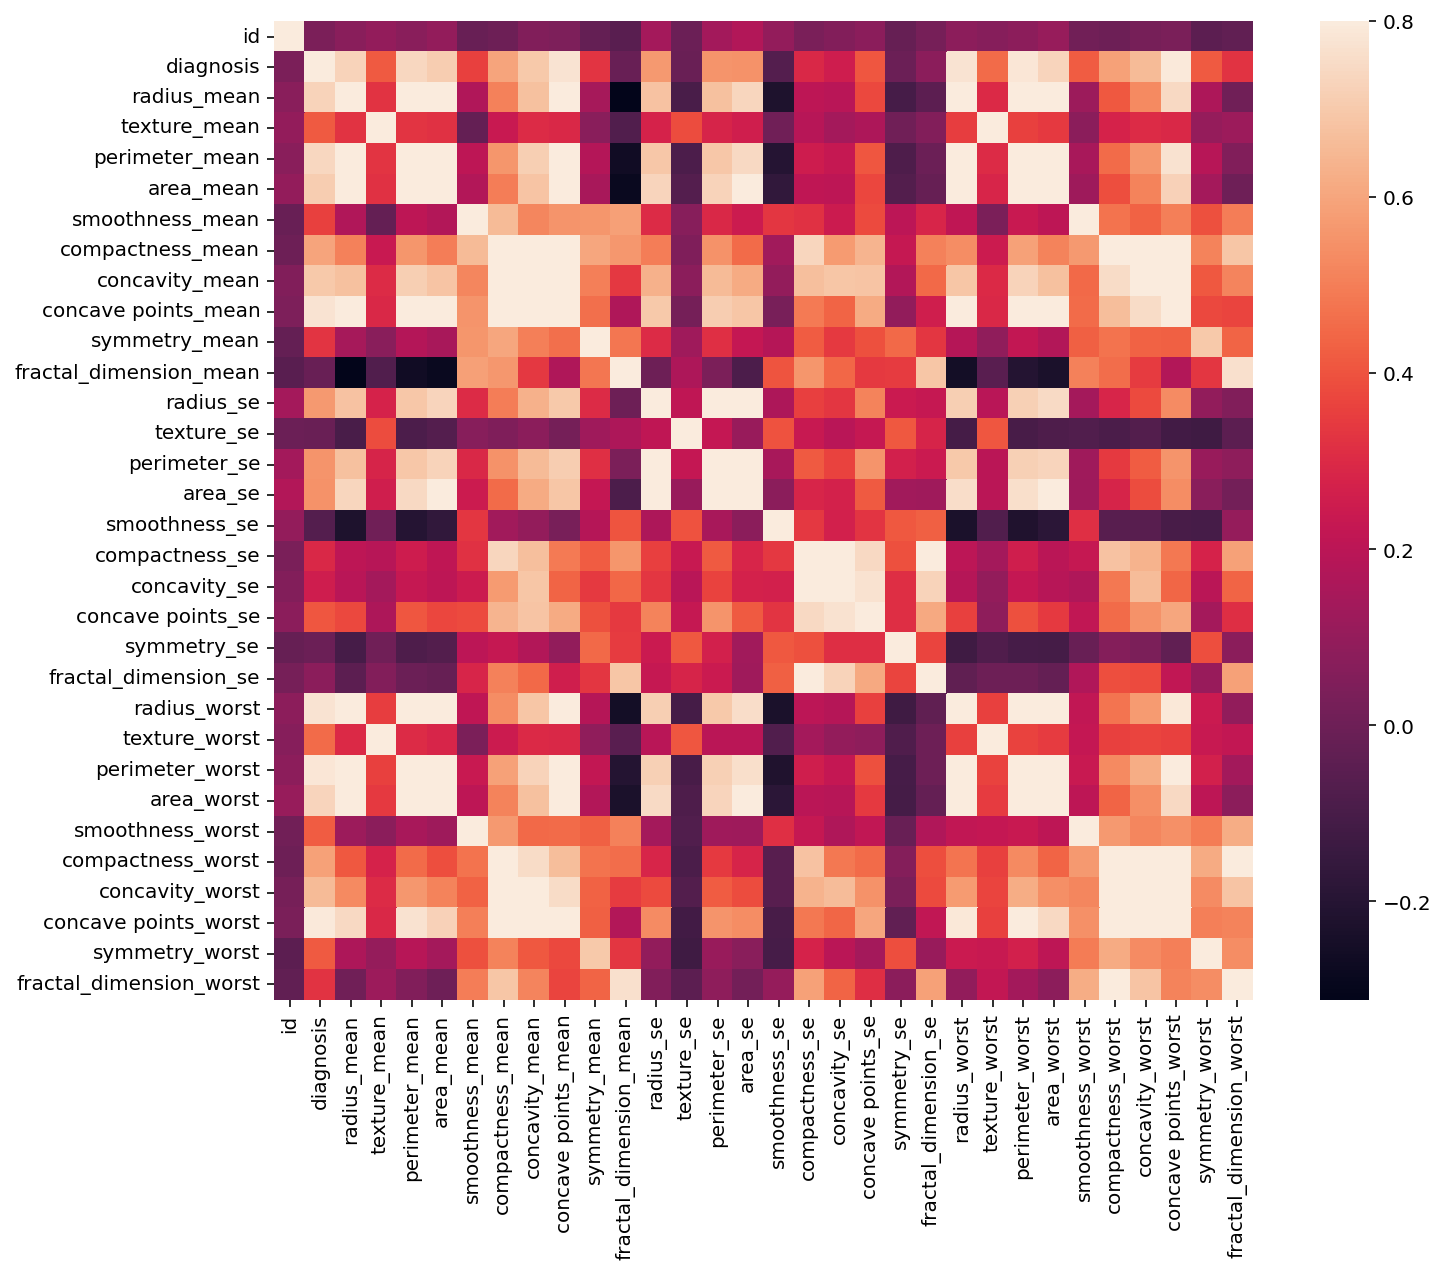

In [ ]:
corrmat = data.corr()

f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [ ]:
corrmat.nlargest(5, 'diagnosis').index   # just for checking

Index(['diagnosis', 'concave points_worst', 'perimeter_worst',
       'concave points_mean', 'radius_worst'],
      dtype='object')

In [ ]:
corrmat.sort_values(by='diagnosis', ascending=False).head(10)   # just for checking

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.039769,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
concave points_worst,0.035174,0.793566,0.744214,0.295316,0.771241,0.722017,0.503053,0.815573,0.861323,0.910155,...,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114
perimeter_worst,0.079986,0.782914,0.965137,0.358040,0.970387,0.959120,0.238853,0.590210,0.729565,0.855923,...,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957
concave points_mean,0.044158,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
radius_worst,0.082405,0.776454,0.969539,0.352573,0.969476,0.962746,0.213120,0.535315,0.688236,0.830318,...,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492
perimeter_mean,0.073159,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_worst,0.107187,0.733825,0.941082,0.343546,0.941550,0.959213,0.206718,0.509604,0.675987,0.809630,...,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647
radius_mean,0.074626,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
area_mean,0.096893,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
concavity_mean,0.050080,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930


In [ ]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
df = data[["diagnosis", "radius_mean", "texture_mean"]]
df.head()

,diagnosis,radius_mean,texture_mean
0,1,17.99,10.38
1,1,20.57,17.77
2,1,19.69,21.25
3,1,11.42,20.38
4,1,20.29,14.34


In [ ]:
np.random.seed(11)
features = ["radius_mean"]
X, y = df[features], df["diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model=LogisticRegression()
model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))
print(model.coef_, model.intercept_)

Score: 85.38%
[[1.03283783]] [-15.35824085]


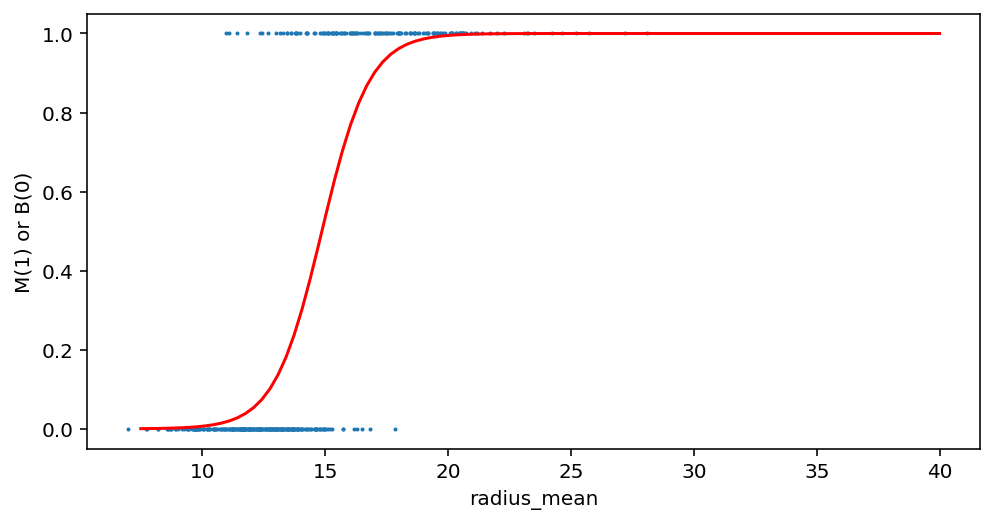

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("radius_mean")
plt.ylabel("M(1) or B(0)")

def logistic(x):
    return 1 / (1 + np.exp(-x))

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logistic(model.coef_ * XX + model.intercept_)[0], c='r')

In [ ]:
X_new = np.array([0, 10, 15, 20, 30, 70])
model.predict_proba(X_new.reshape(-1,1))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[9.99999786e-01, 2.13796531e-07],
       [9.93502780e-01, 6.49721959e-03],
       [4.66468747e-01, 5.33531253e-01],
       [4.97414222e-03, 9.95025858e-01],
       [1.63427844e-07, 9.99999837e-01],
       [0.00000000e+00, 1.00000000e+00]])

In [ ]:
features = ["texture_mean"]            # standard deviation
X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 69.59%


In [ ]:
print(model.coef_, model.intercept_)

[[0.24875651]] [-5.42869688]


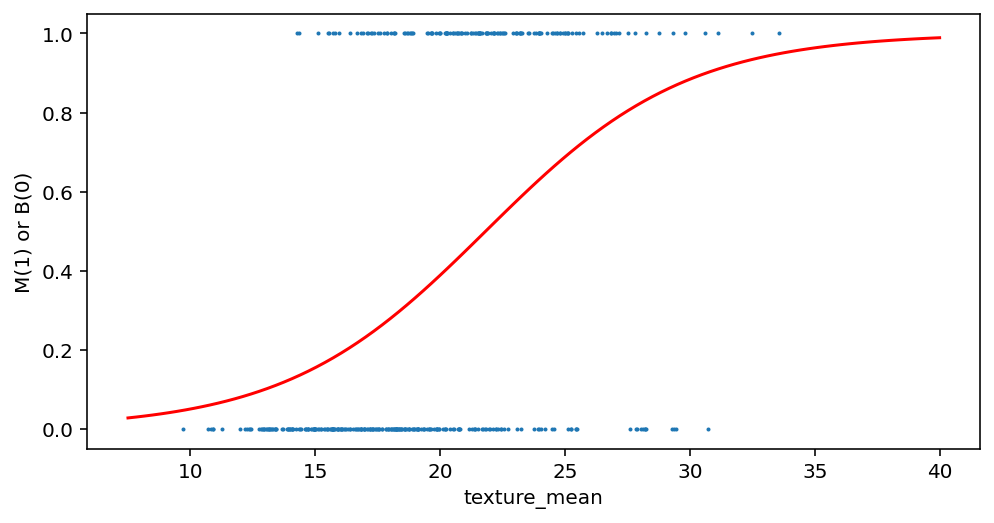

In [ ]:
plt.figure(figsize=(8,4))
plt.scatter(X_train, y_train, s=1)
plt.xlabel("texture_mean")
plt.ylabel("M(1) or B(0)")

XX = np.linspace(7.5, 40, 100)
plt.plot(XX, logistic(model.coef_ * XX + model.intercept_)[0], c='r')

In [ ]:
X_new = np.array([0, 10, 15, 20, 30, 70])
model.predict_proba(X_new.reshape(-1,1)).round(2)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[1.  , 0.  ],
       [0.95, 0.05],
       [0.85, 0.15],
       [0.61, 0.39],
       [0.12, 0.88],
       [0.  , 1.  ]])

### Use two features

In [ ]:
features = ["radius_mean", "texture_mean"]

X = df[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

Score: 89.47%


Text(0, 0.5, 'texture_mean')

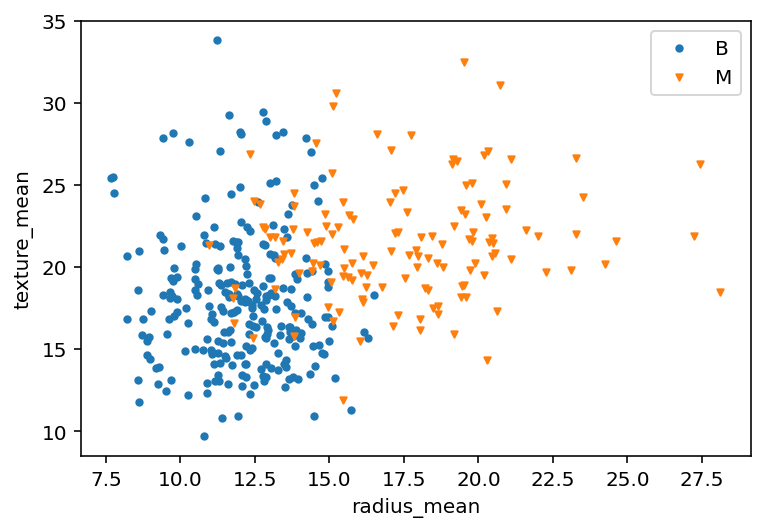

In [ ]:
markers = ['o', 'v']
label = ["B", "M"]         # 양성, 악성
for i in range(2):
    xs = X_train["radius_mean"][y_train == i]
    ys = X_train["texture_mean"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")

Score: 94.15%


Text(0, 0.5, 'perimeter_worst')

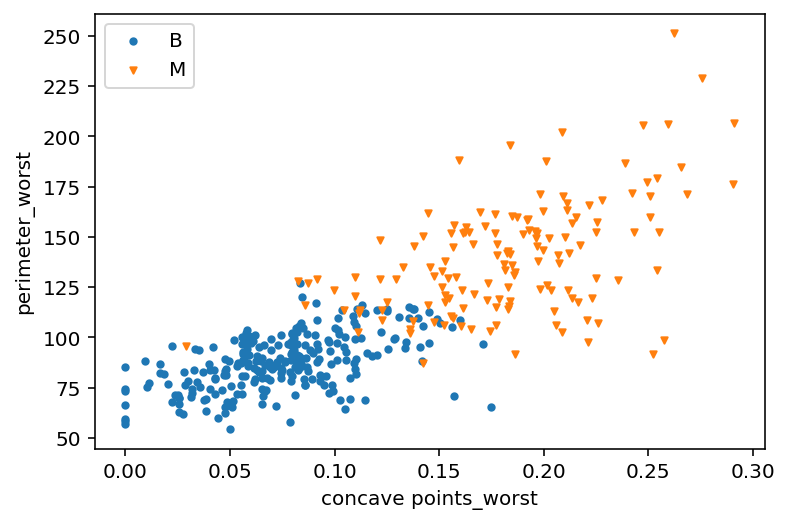

In [ ]:
# one more time with two most correlated features
# 'concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst']

features = ["concave points_worst", "perimeter_worst"]

X = data[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

model.fit(X_train, y_train)
print("Score: {0:.2%}".format(model.score(X_test, y_test)))

markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train["concave points_worst"][y_train == i]
    ys = X_train["perimeter_worst"][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("concave points_worst")
plt.ylabel("perimeter_worst")

### with scaling

Score: 95.32%


Text(0, 0.5, 'perimeter_worst')

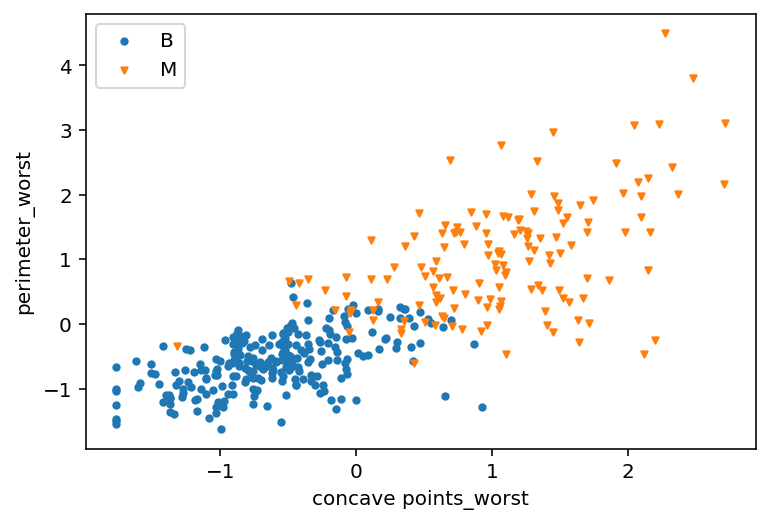

In [ ]:
# with scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
model.fit(X_train_sc, y_train)
X_test_sc = sc.transform(X_test)

print("Score: {0:.2%}".format(model.score(X_test_sc, y_test)))

markers = ['o', 'v']
label = ["B", "M"]
for i in range(2):
    xs = X_train_sc[:,0][y_train == i]
    ys = X_train_sc[:,1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i], s=10)
plt.legend(label)
plt.xlabel("concave points_worst")
plt.ylabel("perimeter_worst")

- we got better performance.

### Use all features
- with scaling

In [ ]:
# 모든 속성을 다 사용하여 로지스틱 회귀 분석을 수행
data = data_org.copy()
data.drop('id', axis=1, inplace=True)
X, y = data.drop('diagnosis', axis=1), data['diagnosis']

In [ ]:
np.random.seed(11)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
model_all = LogisticRegression()
model_all.fit(X_train, y_train)
X_test = sc.transform(X_test)
print("Score: {:.2%}".format(model_all.score(X_train, y_train)))
print("Score: {:.2%}".format(model_all.score(X_test, y_test)))

Score: 99.25%
Score: 95.32%


In [ ]:
# 모든 속성을 다 사용한 경우의 kNN의 성능
from sklearn.neighbors import KNeighborsClassifier  
for i in range(1,21,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    print("K = ", i, "-> Score: {0:.2%}".format(knn.score(X_test, y_test)))

K =  1 -> Score: 94.74%
K =  3 -> Score: 95.91%
K =  5 -> Score: 96.49%
K =  7 -> Score: 96.49%
K =  9 -> Score: 97.66%
K =  11 -> Score: 97.66%
K =  13 -> Score: 97.66%
K =  15 -> Score: 96.49%
K =  17 -> Score: 95.91%
K =  19 -> Score: 95.32%


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print("결정트리 -> {:.2%}".format(tree.score(X_test, y_test)))

결정트리 -> 91.23%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)    # no. of trees
rfc.fit(X_train, y_train)
print("랜덤포레스트 : {:.2%}".format(rfc.score(X_test, y_test)))

랜덤포레스트 : 96.49%


# Multi-class Classification
- LogisticRegression classifier(): 
- OvR and softmax() classifier
- In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme if the ‘multi_class’ option is set to ‘ovr’, and uses the cross-entropy loss if the ‘multi_class’ option is set to ‘multinomial’.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold

### Two multi-class models (with two features)
- softmax regression (cross entropy loss)
- ovr (one-vs-rest)

In [2]:
iris = datasets.load_iris()
X, y = iris.data[:,(2,3)], iris.target

softmax_reg = LogisticRegression(multi_class="multinomial", 
                                 C=10,    # C: inverse of regularization strength
                                 random_state=42) 
ovr_clf = LogisticRegression(multi_class="ovr", 
                             C=10, 
                             random_state=42)
softmax_reg.fit(X, y)
ovr_clf.fit(X, y)

LogisticRegression(C=10, multi_class='ovr', random_state=42)

In [3]:
softmax_reg.score(X, y), ovr_clf.score(X, y)

(0.96, 0.96)

In [4]:
softmax_reg.coef_, softmax_reg.intercept_

(array([[-4.58614563, -2.24129385],
        [ 0.16068263, -2.15860167],
        [ 4.425463  ,  4.39989552]]),
 array([ 18.87514796,   6.3844344 , -25.25958236]))

In [5]:
ovr_clf.coef_, ovr_clf.intercept_

(array([[-4.10145565, -1.8601741 ],
        [ 1.42847909, -2.83149429],
        [ 4.42142146,  5.74004612]]),
 array([ 12.11411097,  -2.73490959, -31.06624834]))

- softmax_reg

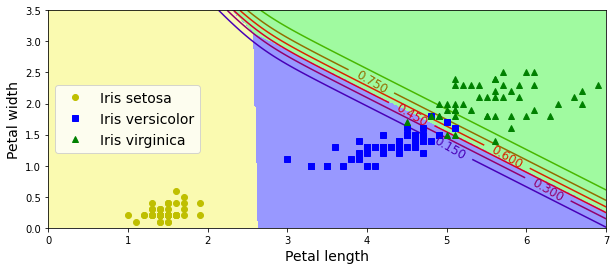

In [6]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 2].reshape(x0.shape)    # probability (class=2)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")     # class 0
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor") # class 1
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")  # class 2

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

- ovr_clf

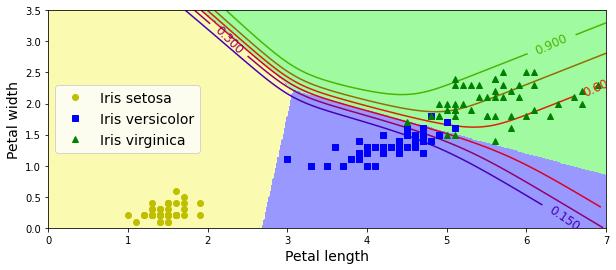

In [7]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = ovr_clf.predict_proba(X_new)
y_predict = ovr_clf.predict(X_new)

zz1 = y_proba[:, 2].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])

plt.show()

In [8]:
softmax_reg.predict([[3, 2.5]]), ovr_clf.predict([[3, 2.5]])

(array([1]), array([2]))

In [9]:
softmax_reg.predict_proba([[3, 2.5]]), ovr_clf.predict_proba([[3, 2.5]])

(array([[0.1151685 , 0.81476356, 0.07006794]]),
 array([[0.18441794, 0.09309245, 0.7224896 ]]))

### four features
- SGDClassifier(): it supports multi-class classification by combining multiple binary classifiers in a “one versus all” (OVA) scheme.
- softmax classifier()

In [ ]:
# SGDClassifier (ovr)
iris = datasets.load_iris()
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf_all = SGDClassifier(max_iter=1000)   # supports ovr multi-classifier
clf_all.fit(X_train, y_train)
print("Score: ", clf_all.score(X_test, y_test))

Score:  0.7111111111111111


In [ ]:
from sklearn import metrics   

y_pred = clf_all.predict(X_test)
metrics.confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 16]])

In [ ]:
cv = KFold(5,shuffle=True)
scores = cross_val_score(clf_all, X, y, cv=cv)
print(scores, scores.mean())
# print(cross_val_score(SGDClassifier(), X, y, cv=cv))    # 거의 100%에 가까운 score 

[0.43333333 1.         0.7        0.76666667 0.86666667] 0.7533333333333333


In [ ]:
# Softmax classifier
softmax_all = LogisticRegression(multi_class="multinomial", C=10, random_state=42,
                                 max_iter=2000)
softmax_all.fit(X_train, y_train)
softmax_all.score(X_test, y_test)

1.0

In [ ]:
cv = KFold(5,shuffle=True)
scores = cross_val_score(softmax_all, X, y, cv=cv)
scores, scores.mean()

(array([0.93333333, 1.        , 0.96666667, 0.96666667, 0.96666667]),
 0.9666666666666666)

In [ ]:
# OvR with LogisticRegression
ovr_clf = LogisticRegression(multi_class="ovr", C=10, random_state=42,
                                 max_iter=2000)
ovr_clf.fit(X_train, y_train)
ovr_clf.score(X_test, y_test)

0.9777777777777777

In [ ]:
cv = KFold(5,shuffle=True)
scores = cross_val_score(ovr_clf, X, y, cv=cv)
scores, scores.mean()

(array([1.        , 1.        , 0.86666667, 0.93333333, 0.96666667]),
 0.9533333333333334)

# Exercise

In [ ]:
# Softmax
score = [-1, -0.5, 1.0, 1.5]

prob = []
sum = 0
for i in range(len(score)):
    prob.append(np.exp(score[i]))
    sum = sum + np.exp(score[i])

prob = prob/sum
print(prob.round(3))

[0.045 0.074 0.333 0.548]


In [ ]:
np.exp(score)/np.exp(score).sum()

array([0.04500395, 0.07419897, 0.33253672, 0.54826036])

In [ ]:
from scipy.special import softmax
softmax(score)

array([0.04500395, 0.07419897, 0.33253672, 0.54826036])

In [ ]:
# print 연습
for x in range(1, 11):
    print('{0:4d} {2:4d} {1:4d}'.format(x, x*x*x, x*x))

   1    1    1
   2    4    8
   3    9   27
   4   16   64
   5   25  125
   6   36  216
   7   49  343
   8   64  512
   9   81  729
  10  100 1000


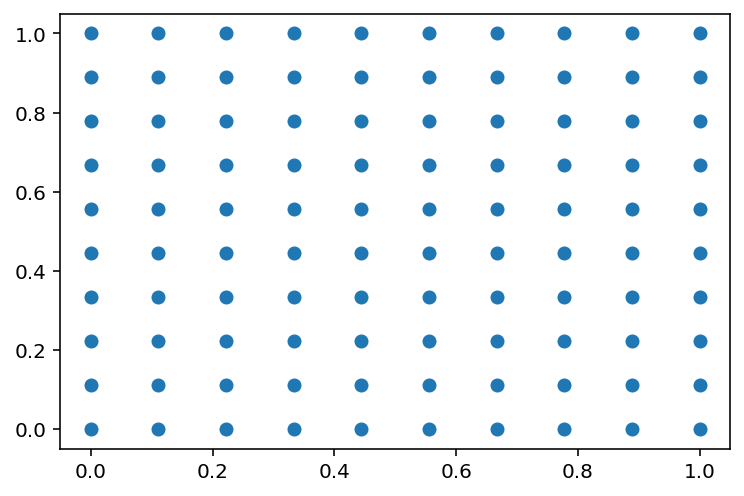

In [ ]:
# meshgrid()
x0, x1 = np.meshgrid(
        np.linspace(0, 1, 10).reshape(-1, 1),
        np.linspace(0, 1, 10).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
plt.scatter(X_new[:,0], X_new[:,1])